# How does GANs work and Getting started

**we are going to be using the fashion mnist data set so this is going to allow us to get images of things like t-shirts shoes ,so like it's got a whole bunch of random images that we can actually use for our particular data set so the thing that we're then going to do is we're actually going to have to build up a generator. so generator is going to take in a bunch of random numbers and this is commonly referred to as a
latent dimension so it might be like [1 23 42 71] so on and what that is actually going to output is it's going to take in those random numbers and it's going to output a set of values which represent an image so what we're actually going to do so let's say for example the images that
we're getting back from tfds are going to be in the shape 28 by 28 by 1. we might take in some random values into our generator let's say in our particular case we'll take in 128 random values those 128 values will be reshaped into a format that allows us to output a set of values which are 28 by 28 by 1.

so we'll actually take those 128 values and we'll build up our generator so our generator will be comprised of a number of convolutional neural network layers as well as some up sampling layers and eventually what we are going to get probably going to output an image which is 28 by 28 by one which is effectively a generated image.


now this is where the discriminator comes in we'll actually take the generated image and pass it through a discriminator neural network and that is again going to have a number of convolutional neural network layers but the final output for that neural network is going to be a zero
or a one which represents whether or not it's a true or a fake image so we've set it up so that zero represents true
and 1 represents fake now other implementations might do this a little bit differently but this is definitely
going to work so we'll then take that generated image and bang it into our discriminator at the same time we'll also take real images all the way from tf-ds
so that will come from our tfts model and we'll be able to train our discriminator as to what is real and what is fake

finally when it comes to actually testing this model we can actually take the generator model specifically discard the discriminator because we don't really need it anymore it's purely needed for training we can then pass through those 128 random variables to
our generator let's say that this is our generator is represented as a pink modelcan mod and then what that is going to do is it's going to output our different images of fashion so we might get a t-shirt we might get a boot**

In [1]:
import torch

# Check if a GPU is available
if torch.cuda.is_available():
    print("GPU is available!")
    
    # Get the number of GPUs available
    print(f"Number of GPUs: {torch.cuda.device_count()}")

    # Get the name of the first GPU
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("No GPU available.")


No GPU available.


In [2]:
!pip install  tensorflow-datasets 

In [3]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf

In [5]:
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

In [6]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.STBIQ8_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.STBIQ8_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
ds.as_numpy_iterator().next()['label']

2

DATA VISUALIZATION AND PREPROCESSING

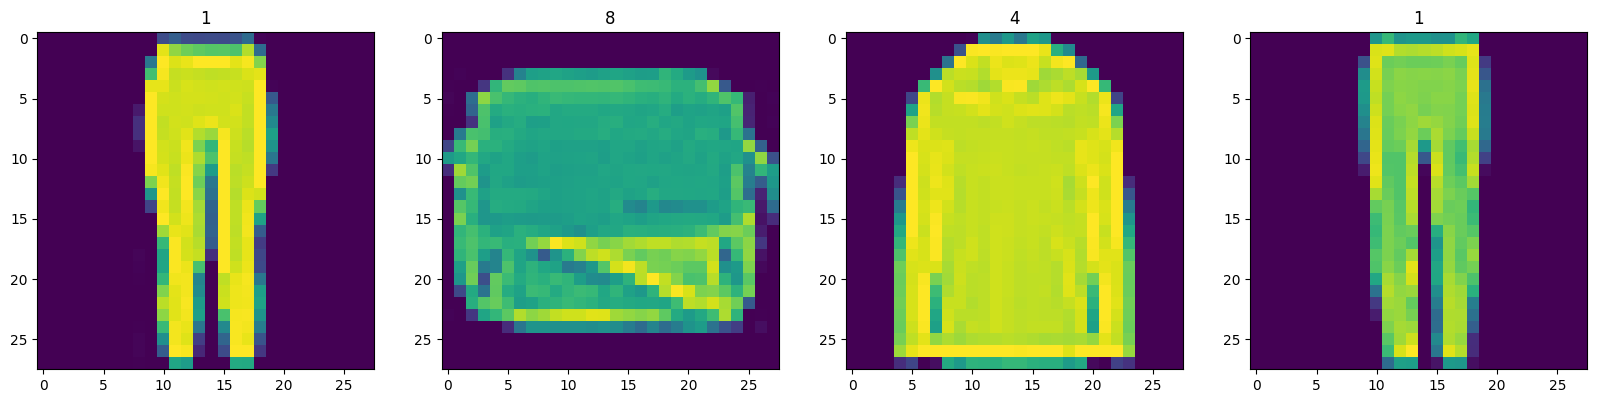

In [8]:
import numpy as np
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()
# Getting data out of the pipeline
dataiterator.next()['image']
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx in range(4): 
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(sample['label'])

# preprocessing and making Data pipeline for images for better dl model training

In [9]:
# Scaling images between 0 and 1 and returning images 
def scale_images(data): 
    image = data['image']
    return image / 255

# Reload the dataset 
ds = tfds.load('fashion_mnist', split='train')

#Data pipeline steps for tensorflow 

# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images) 


# Cache the dataset for that batch 
ds = ds.cache()

# Shuffle it up to ensure variety every time we run 
ds = ds.shuffle(60000)

# Batch into 128 images per sample
ds = ds.batch(128)

# Reduces the likelihood of bottlenecking 
ds = ds.prefetch(64)


In [10]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

****we'll build two models now ,the generator model will be built to try to generate images of clothing and fashion the discriminator will try to learn to spot the fakes so thengenerator is almost like an artist trying to forge things and the discriminator is an art critic trying to spot them out ****